In [1]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
UUID = 'dc5b519d-8687-441b-9b59-a9d307df5678'
FOLDER_DIR = os.path.join('..', 'results', UUID)

In [5]:
cells = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'cells.csv'))
steps = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'steps.csv'))
prevt = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'prevt.csv'))

In [20]:
prevt

,isolation,mask,vaccine
0,23,39,39


In [7]:
infection = pd.DataFrame()
for column in steps.columns:
    infection[column] = steps[column].apply(lambda x: x in ('EXPOSED', 'INFECTOUS'))

/tmp/ipykernel_398892/699909884.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  infection[column] = steps[column].apply(lambda x: x in ('EXPOSED', 'INFECTOUS'))


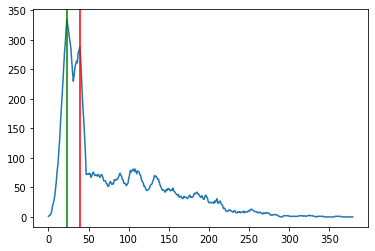

In [23]:
plt.plot(infection.sum(axis=1).values)
plt.axvline(x=prevt['mask'].item(), color='red')
plt.axvline(x=prevt['isolation'].item(), color='green')
# plt.axvline(x=prevt['vaccine'].item(), color='blue')

## Pessoas contaminadas por dia

In [72]:
infection = pd.DataFrame()
for coloun in steps.columns:
    infection.loc[:, coloun] = [0] * len(steps.columns)
    
    if 'EXPOSED' not in steps.loc[:, coloun].unique():
        continue

    first_exposed_day= np.argmax((steps.loc[:, coloun] == 'EXPOSED'))
    infection.loc[first_exposed_day, coloun] = 1

/home/sena/Documents/programs/anaconda3/envs/TTIC/lib/python3.9/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [82]:
b = infection.sum(axis=1)[:350]

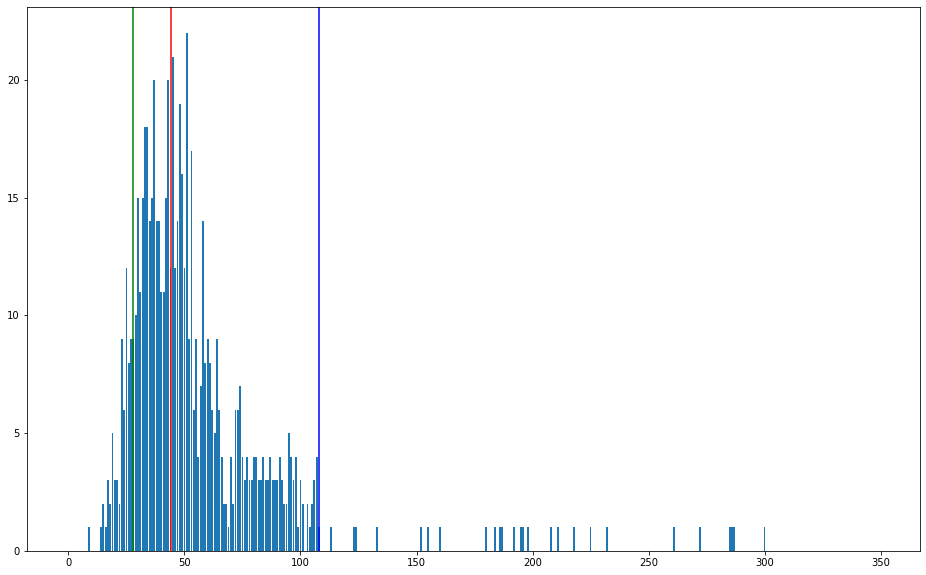

In [96]:
plt.figure(figsize=(16, 10))

plt.bar(b.index, b.values)
plt.axvline(x=prevt['mask'].item(), color='red')
plt.axvline(x=prevt['isolation'].item(), color='green')
plt.axvline(x=prevt['vaccine'].item(), color='blue')

## Pessoas mortas por dia

In [85]:
dead = pd.DataFrame()
for coloun in steps.columns:
    dead.loc[:, coloun] = [0] * len(steps.columns)
    
    if 'DEAD' not in steps.loc[:, coloun].unique():
        continue

    first_exposed_day= np.argmax((steps.loc[:, coloun] == 'DEAD'))
    dead.loc[first_exposed_day, coloun] = 1

In [89]:
b = dead.sum(axis=1)[:350]

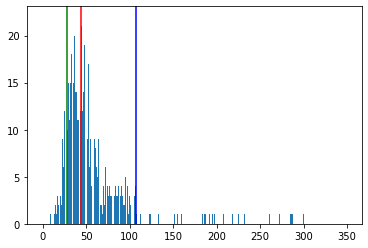

In [90]:
plt.bar(b.index, b.values)
plt.axvline(x=prevt['mask'].item(), color='red')
plt.axvline(x=prevt['isolation'].item(), color='green')
plt.axvline(x=prevt['vaccine'].item(), color='blue')